In [7]:
import numpy as np
from dedalus import public as de
import matplotlib.pyplot as plt

In [19]:
nx, nz = (32, 16)
scale = 4

# Two domains
xbasis = de.Fourier('x', nx, interval=(0, 1), dealias=3/2)
ybasis = de.Fourier('y', nx, interval=(0, 1), dealias=3/2)
zbasis = de.Chebyshev('z', nz, interval=(0, 1), dealias=3/2)
domain0 = de.Domain([xbasis, ybasis, zbasis], grid_dtype=np.float64)

# Two domains
xbasis = de.Fourier('x', scale*nx, interval=(0, 1), dealias=3/2)
ybasis = de.Fourier('y', scale*nx, interval=(0, 1), dealias=3/2)
zbasis = de.Chebyshev('z', scale*nz, interval=(0, 1), dealias=3/2)
domain1 = de.Domain([xbasis, ybasis, zbasis], grid_dtype=np.float64)

In [29]:
u0 = domain0.new_field()
u1 = domain1.new_field()

u0['g'] = np.random.rand(nx, nx, nz)

u0.set_scales(scale)
u1['g'] = u0['g']

u0.set_scales(1)

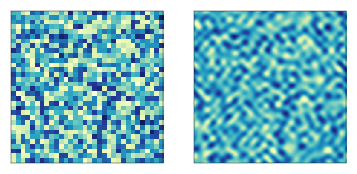

In [30]:
fig, axs = plt.subplots(ncols=2)
plt.sca(axs[0])
plt.imshow(u0['g'][:, :, 0])

plt.sca(axs[1])
plt.imshow(u1['g'][:, :, 0])

for ax in axs:
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)